In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('../data/shampoo.txt')

In [3]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


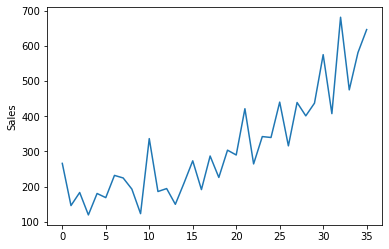

In [4]:
sns.lineplot(df.index,df.Sales)

In [5]:
series = df.Sales.tolist()

In [6]:
len(series)

36

In [7]:
def average(x):
  return [np.mean(x)]*(len(x))
average([1,2,3,4])

[2.5, 2.5, 2.5, 2.5]

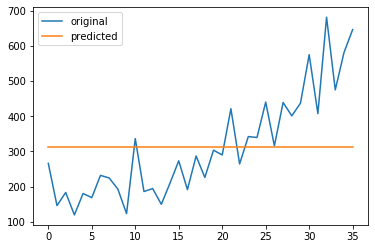

In [8]:
plt.plot(df.index, series , label='original' )
plt.plot( df.index, average(series), label = 'predicted' )
plt.legend()

In [9]:
def moving_average(x,n):
  res = [np.nan]*(n-1)
  for i in range(n,len(x)+1):
    res.append(np.mean(x[i-n:i]))
  return res

In [10]:
def moving_median(x,n):
  res = [np.nan]*(n-1)
  for i in range(n,len(x)+1):
    res.append(np.median(x[i-n:i]))
  return res

In [11]:
moving_average(np.arange(1,7), 3)

[nan, nan, 2.0, 3.0, 4.0, 5.0]

In [12]:
moving_median(np.arange(1,7), 3)

[nan, nan, 2.0, 3.0, 4.0, 5.0]

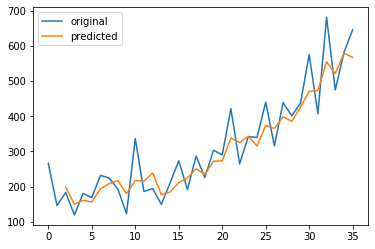

In [13]:
plt.plot(df.index, series , label='original' )
plt.plot( df.index, moving_average(series,3), label = 'predicted' )
plt.legend()

In [14]:
def double_moving_average(series ,n ):
  res = moving_average(series,n)
#   print(res)
  res = moving_average(res,n)
#   print(res)
  return res

In [15]:
double_moving_average( np.arange(1,7) , 3);

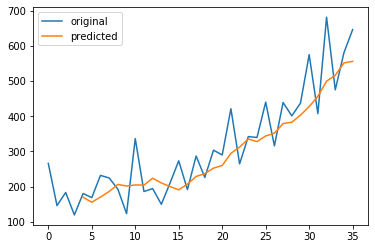

In [16]:
plt.plot( series , label='original' )
plt.plot(  double_moving_average(series ,3), label = 'predicted' )
plt.legend()

In [17]:
def single_exponential_smoothing(x , a):
  res = [ np.nan , x[0]]
  for i in range( 2 , len(x) ):
    res.append( a*x[i-1] + (1-a)*res[i-1] )
  return res

In [18]:
single_exponential_smoothing(np.arange(1,7), 0.5)

[nan, 1, 1.5, 2.25, 3.125, 4.0625]

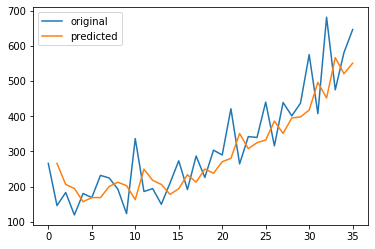

In [22]:
plt.plot( series , label='original' )
plt.plot(  single_exponential_smoothing(series ,0.5), label = 'predicted' )
plt.legend()

In [23]:
# !pip install statsmodels

In [24]:
def double_exponential_smoothing(x , a=0.5, g=0.5 ):
  res = [x[0]]
  s = [x[0]]
#   print(x)
  b = [np.mean(np.sum(x[1:4]) - np.sum(x[0:3]) )]
  for t in range(1,len(x)):
    s.append(a*x[t] + (1-a)*( s[t-1]+b[t-1] ) )
    b.append( g*(s[t] - s[t-1]) + (1-g)*(b[t-1]) )
    res.append(s[t]+b[t])
#   print(s)
#   print(b)
  return s, res

In [25]:
double_exponential_smoothing(np.arange(1,7))

([1, 3.0, 4.25, 5.0625, 5.703125, 6.34765625],
 [1, 5.5, 6.125, 6.40625, 6.6953125, 7.166015625])

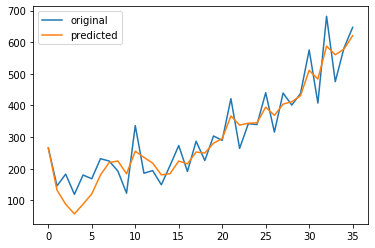

In [26]:
plt.plot(df.index, series , label='original' )
plt.plot( df.index, double_exponential_smoothing(series)[0] , label = 'predicted' )
plt.legend()

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

In [28]:
# model = ExponentialSmoothing()

In [29]:
from scipy.signal import correlate

In [31]:
correlate(series, series )

(71,)

In [32]:
len(series)

36